In [795]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 6))
B = 1

def uniform(u, t, B):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz = u
    
    r = np.sqrt(x**2 + y**2)
    
    v = np.sqrt(vx**2 + vy**2)
    v = q*r*B/m
    
    #vx = -v*x/r
    #vy = -v*y/r
    
    a = q*v*B/m
    ax = -a*(x/r)
    ay = -a*(y/r)
    az = 0
    
    return vx, vy, vz, ax, ay, az

p0 = [ 0,  1, 5, 1,  0, -1]


In [796]:
from scipy.integrate import odeint
single_particle = odeint(uniform, p0, t, args=(B,))

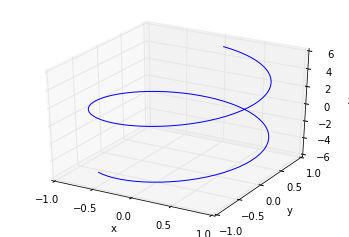

In [797]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(single_particle[:,0], single_particle[:,1], single_particle[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [674]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
l = np.zeros((len(t), 6))

def B_random(t):
    return np.random.randint(-5, 5, 1)

def nonuniform(l, t, B):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz = l
    
    r = np.sqrt(x**2 + y**2)
    
    v = np.sqrt(vx**2 + vy**2)
    v = q*r*B(t)/m
    
    a = q*v*B(t)/m
    ax = -a*(x/r)
    ay = -a*(y/r)
    az = 0
    
    return vx, vy, vz, ax, ay, az

p0 = [0, 1, 0, 1, 0, -1]



In [675]:
from scipy.integrate import odeint
random = odeint(nonuniform, p0, t, args=(B_random,))

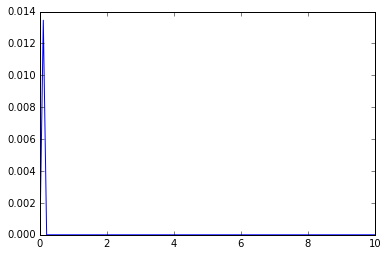

In [676]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(t, random[:,0])
plt.show()

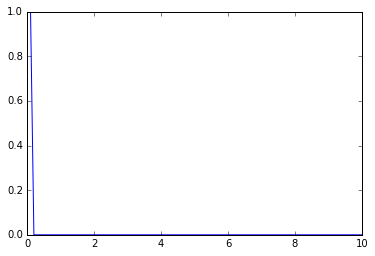

In [677]:
plt.plot(t, random[:,1])
plt.show()

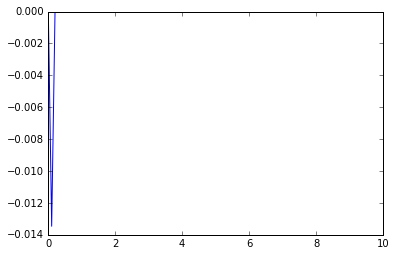

In [678]:
plt.plot(t, random[:,2])
plt.show()

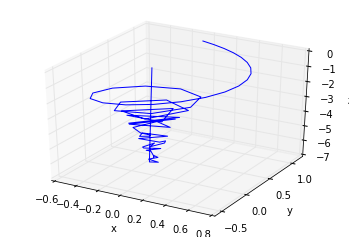

In [679]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(solution[:,0], solution[:,1], solution[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [815]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 6))
B = 1

def uniform(u, t, B):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz = u
    
    r = np.sqrt(x**2 + y**2)
    
    v = np.sqrt(vx**2 + vy**2)
    v = q*r*B/m
    
    #vx = -v*x/r
    #vy = -v*y/r
    
    a = q*v*B/m
    ax = -a*(x/r)
    ay = -a*(y/r)
    az = 0
    
    return vx, vy, vz, ax, ay, az

p0 = [ 0,  1, 5, 1,  0, -1]
p1 = [ 1,  0, 5, 0, -1, -1]
p2 = [ 0, -1, 5, -1, 0, -1]
p3 = [-1,  0, 5,  0, 1, -1]


In [816]:
from scipy.integrate import odeint
uniform0 = odeint(uniform, p0, t, args=(B,))
uniform1 = odeint(uniform, p1, t, args=(B,))
uniform2 = odeint(uniform, p2, t, args=(B,))
uniform3 = odeint(uniform, p3, t, args=(B,))

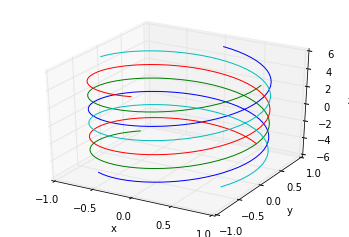

In [819]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(uniform0[:,0], uniform0[:,1], uniform0[:,2])
ax.plot(uniform1[:,0], uniform1[:,1], uniform1[:,2])
ax.plot(uniform2[:,0], uniform2[:,1], uniform2[:,2])
ax.plot(uniform3[:,0], uniform3[:,1], uniform3[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

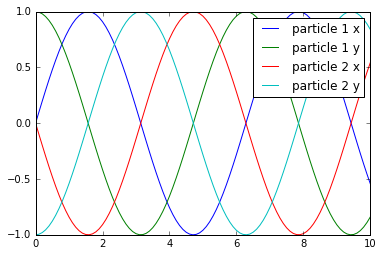

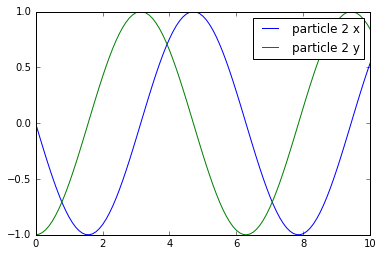

In [821]:
plt.plot(t, uniformpart[:,0], label="particle 1 x")
plt.plot(t, uniformpart[:,1], label="particle 1 y")
plt.plot(t, uniform2[:,0],    label="particle 2 x")
plt.plot(t, uniform2[:,1],    label="particle 2 y")
plt.legend()
plt.show()

#print uniformpart[:,0]
#print uniformpart[:,1]
#print uniform2[:,0]
#print uniform2[:,1]

plt.plot(t, uniform2[:,0], label="particle 2 x")
plt.plot(t, uniform2[:,1], label="particle 2 y")
plt.legend()
plt.show()


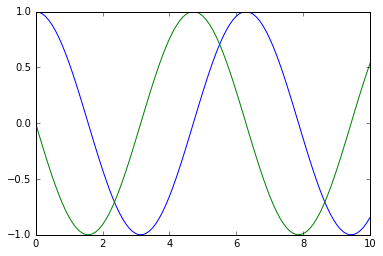

In [822]:
plt.plot(t, uniformpart[:,3])
plt.plot(t, uniformpart[:,4])
plt.plot(t, uniformpart[:,5])
plt.show()

In [823]:
energy = (1.0/2)*((uniformpart[:,3])**2 + (uniformpart[:,4])**2)
print energy

[ 0.5         0.5         0.5         0.5         0.5         0.49999998
  0.49999999  0.5         0.5         0.5         0.49999999  0.49999999
  0.49999999  0.49999999  0.49999999  0.49999999  0.49999999  0.49999998
  0.49999998  0.49999998  0.49999998  0.49999998  0.49999998  0.49999997
  0.49999997  0.49999997  0.49999997  0.49999998  0.49999998  0.49999998
  0.49999999  0.49999999  0.49999999  0.49999999  0.49999999  0.49999999
  0.5         0.5         0.5         0.5         0.5         0.5
  0.50000001  0.50000001  0.50000001  0.50000001  0.50000001  0.50000002
  0.50000002  0.50000002  0.50000002  0.50000002  0.50000002  0.50000003
  0.50000003  0.50000003  0.50000003  0.50000003  0.50000004  0.50000004
  0.50000004  0.50000004  0.50000005  0.50000005  0.50000005  0.50000005
  0.50000005  0.50000006  0.50000006  0.50000006  0.50000006  0.50000007
  0.50000007  0.50000007  0.50000008  0.50000008  0.50000008  0.50000009
  0.50000009  0.50000009  0.5000001   0.5000001   0.500000

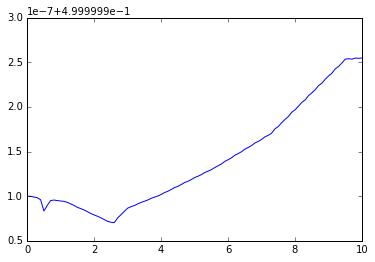

In [824]:
plt.plot(t, energy)
plt.show()

In [825]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 6))

def B_constant(t):
    return 1

def B_oscillating(t):
    return np.sin(2*np.pi*t)

def B_exponential(t):
    B = np.exp(t)
    return B

def oscillating(u, t, B):              # t, u, B
    q = 1
    m = 1
    x, y, z, vx, vy, vz = u
    
    r = np.sqrt(x**2 + y**2)
    v = np.sqrt(vx**2 + vy**2)
    
    v = q*r*B(t)/m
    #vx = vt*x/r
    #vy = vt*y/r
    #vz = vz
    
    a = q*v*B(t)/m
    ax = -a*(x/r)
    ay = -a*(y/r)
    az = 0 #-a*(/r)
    
    return vx, vy, vz, ax, ay, az

p0 = [0,  1, 5, -1, 0, -1]
p1 = [0, -1, 5,  1, 0, -1]


In [826]:
from scipy.integrate import odeint
oscillate  = odeint(oscillating, p0, t, args=(B_oscillating,))
oscillate2 = odeint(oscillating, p1, t, args=(B_oscillating,))

t_test = np.linspace(0, 100, 10*N)

test       = odeint(oscillating, p0, t_test, args=(B_oscillating,))
test2      = odeint(oscillating, p1, t_test, args=(B_oscillating,))

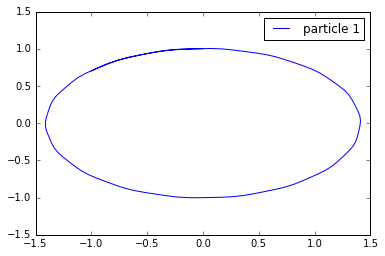

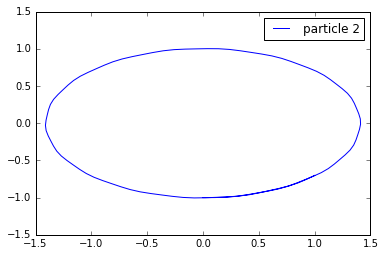

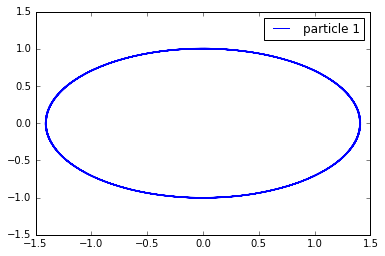

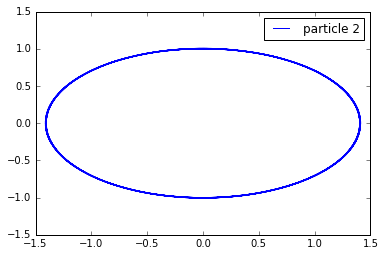

In [827]:
plt.plot(oscillate[:,0],  oscillate[:,1],  label="particle 1")
plt.legend()
plt.show()
plt.plot(oscillate2[:,0], oscillate2[:,1], label="particle 2")
plt.legend()
plt.show()
plt.plot(test[:,0], test[:,1],  label="particle 1")
plt.legend()
plt.show()
plt.plot(test2[:,0], test2[:,1], label="particle 2")
plt.legend()
plt.show()
#print uniformpart[:,0]
#print uniformpart[:,1]
#print uniform2[:,0]
#print uniform2[:,1]

#plt.plot(t, uniform2[:,0], label="particle 2 x")
#plt.plot(t, uniform2[:,1], label="particle 2 y")
#plt.legend()
#plt.show()


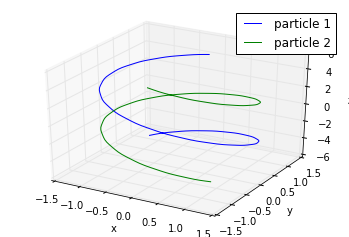

In [828]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(oscillate[:,0],  oscillate[:,1],  oscillate[:,2], label="particle 1")
ax.plot(oscillate2[:,0], oscillate2[:,1], oscillate[:,2], label="particle 2")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()


In [829]:
from scipy.integrate import odeint
exponential = odeint(oscillating, p0, t, args=(B_exponential,))

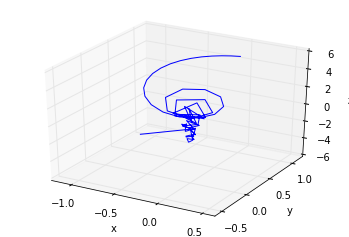

In [695]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(exponential[:,0], exponential[:,1], exponential[:,2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [787]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 12))
B = 1

def uniform2(u, t, B):              # t, u, B
    q = 1
    m = 1
    x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2 = u
    
    d = np.sqrt((x2-x1)**2 +(y2-y1)**2)
    d = 2
    
    r1 = np.sqrt(z1**2 + y1**2)
    r2 = np.sqrt(z2**2 + y2**2)
    
    v1 = np.sqrt(vz1**2 + vy1**2)
    v1 = q*r1*B/m
    v2 = np.sqrt(vz2**2 + vy2**2)
    v2 = q*r2*B/m
    
    a1 = q*v1*B/m
    ax1 = 0 #-a1*(x1/r1)
    ay1 = -a1*(y1/r1)
    az1 = -a1*(z1/r1)
    
    a2 = q*v2*B/m
    ax2 = 0 #-a2*(x2/r2)
    ay2 = -a2*(y2/r2)
    az2 = -a2*(z2/r2)
    
    return vx1, vy1, vz1, ax1, ay1, az1, vx2, vy2, vz2, ax2, ay2, az2

p0 = [0,  1, 0, 0, 0, 1,
      0, -1, 0, 0, 0, -1]


In [788]:
twoparticles = odeint(uniform2, p0, t, args=(B,))

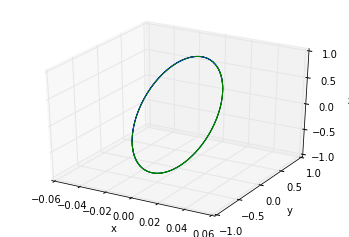

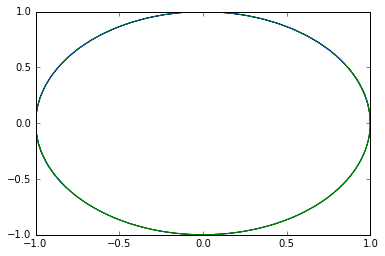

In [790]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(twoparticles[:,0], twoparticles[:,1], twoparticles[:,2])
ax.plot(twoparticles[:,6], twoparticles[:,7], twoparticles[:,8])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


plt.plot(twoparticles[:,1], twoparticles[:,2])
plt.plot(twoparticles[:,7], twoparticles[:,8])
plt.show()

In [793]:
p1 = [1/np.sqrt(2), 1/np.sqrt(2), 0, 0, 0, 1/np.sqrt(2),
     -1/np.sqrt(2), -1/np.sqrt(2), 0, 0, 0, 1/np.sqrt(2)]

part2 = odeint(uniform2, p1, t, args=(B,))

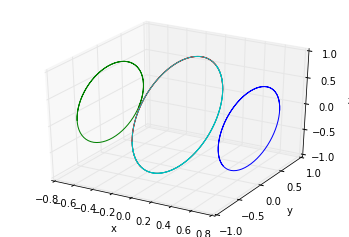

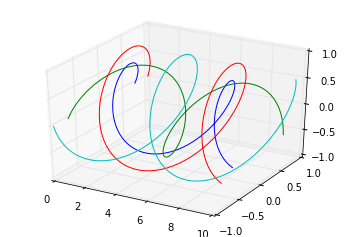

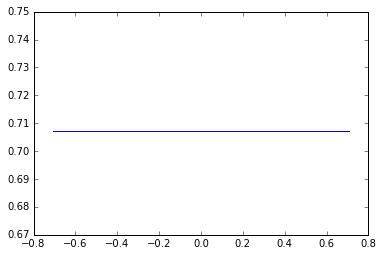

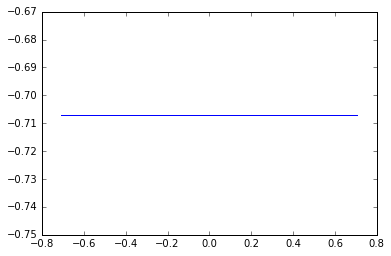

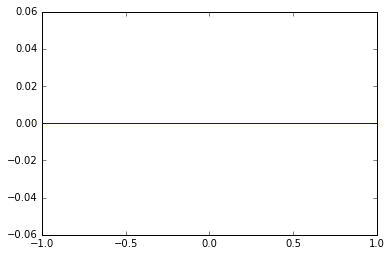

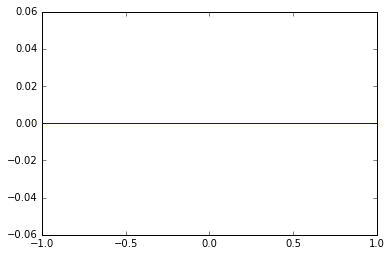

In [830]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(part2[:,0], part2[:,1], part2[:,2])
ax.plot(part2[:,6], part2[:,7], part2[:,8])

ax.plot(twoparticles[:,0], twoparticles[:,1], twoparticles[:,2])
ax.plot(twoparticles[:,6], twoparticles[:,7], twoparticles[:,8])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(t, part2[:,1], part2[:,2])
ax.plot(t, part2[:,7], part2[:,8])

ax.plot(t, twoparticles[:,1], twoparticles[:,2])
ax.plot(t, twoparticles[:,7], twoparticles[:,8])
plt.show()


plt.plot(part2[:,2], part2[:,0])
plt.show()
plt.plot(part2[:,8], part2[:,6])
plt.show()
plt.plot(twoparticles[:,2], twoparticles[:,0])
plt.show()
plt.plot(twoparticles[:,8], twoparticles[:,6])
plt.show()

In [853]:
import numpy as np

# vx**2 + vy**2 = qRB/m       q = N*charge of electron
# x**2 + y**2 = 1
# x0, y0 = 1, 0
# vx0, vy0 = 0, qRB/m

N = 101

t = np.linspace(0, 10, N)
u = np.zeros((len(t), 48))
B = 1

def ring(u, t, B):              # t, u, B
    q = 1
    m = 1
    x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2, x3, y3, z3, vx3, vy3, vz3, x4, y4, z4, vx4, vy4, vz4, x5, y5, z5, vx5, vy5, vz5, x6, y6, z6, vx6, vy6, vz6, x7, y7, z7, vx7, vy7, vz7, x8, y8, z8, vx8, vy8, vz8 = u
    
    
    d15 = np.sqrt((x5-x1)**2 + (y5-y1)**2 + (z5-z1)**2)
    d15 = 2
    d26 = np.sqrt((x6-x2)**2 + (y6-y2)**2 + (z6-z2)**2)
    d26 = 2
    d37 = np.sqrt((x7-x3)**2 + (y7-y3)**2 + (z7-z3)**2)
    d37 = 2
    d48 = np.sqrt((x8-x4)**2 + (y8-y4)**2 + (z8-z4)**2)
    d48 = 2
    
    
    r1 = np.sqrt(z1**2 + y1**2)
    r2 = np.sqrt(z2**2 + y2**2)
    r3 = np.sqrt(z3**2 + y3**2)
    r4 = np.sqrt(z4**2 + y4**2)
    r5 = np.sqrt(z5**2 + y5**2)
    r6 = np.sqrt(z6**2 + y6**2)
    r7 = np.sqrt(z7**2 + y7**2)
    r8 = np.sqrt(z8**2 + y8**2)
    
    
    v1 = np.sqrt(vz1**2 + vy1**2)
    v2 = np.sqrt(vz2**2 + vy2**2)
    v3 = np.sqrt(vz3**2 + vy3**2)
    v4 = np.sqrt(vz4**2 + vy4**2)
    v5 = np.sqrt(vz5**2 + vy5**2)
    v6 = np.sqrt(vz6**2 + vy6**2)
    v7 = np.sqrt(vz7**2 + vy7**2)
    v8 = np.sqrt(vz8**2 + vy8**2)
    
    
    v1 = q*r1*B/m
    v2 = q*r2*B/m
    v3 = q*r3*B/m
    v4 = q*r4*B/m
    v5 = q*r5*B/m
    v6 = q*r6*B/m
    v7 = q*r7*B/m
    v8 = q*r8*B/m
    
    
    a1 = q*v1*B/m
    ax1 = -a1*((x1-0)/r1)
    ay1 = -a1*(y1/r1)
    az1 = -a1*(z1/r1)
    
    
    a2 = q*v2*B/m
    ax2 = -a2*((x2-1.0/np.sqrt(2))/r2)
    ay2 = -a2*(y2/r2)
    az2 = -a2*(z2/r2)
    
    
    a3 = q*v3*B/m
    ax3 = -a3*(x3-1)/(r3+1)
    ay3 = -a3*(y3/(r3+1))
    az3 = -a3*(z3/(r3+1))
    
    
    a4 = q*v4*B/m
    ax4 = -a4*((x4-1.0/np.sqrt(2))/r4)
    ay4 = -a4*(y4/r4)
    az4 = -a4*(z4/r4)
    
    
    a5 = q*v5*B/m
    ax5 = -a5*((x5-0)/r5)
    ay5 = -a5*(y5/r5)
    az5 = -a5*(z5/r5)
    
    
    a6 = q*v6*B/m
    ax6 = -a6*((x6-1.0/np.sqrt(2))/r6)
    ay6 = -a6*(y6/r6)
    az6 = -a6*(z6/r6)
    
    
    a7 = q*v7*B/m
    ax7 = -a7*((x7-1)/(r7+1))
    ay7 = -a7*(y7/(r7+1))
    az7 = -a7*(z7/(r7+1))
    
    
    a8 = q*v8*B/m
    ax8 = -a8*((x8-1.0/np.sqrt(2))/r8)
    ay8 = -a8*(y8/r8)
    az8 = -a8*(z8/r8)
    
    
    return [vx1, vy1, vz1, ax1, ay1, az1,
            vx2, vy2, vz2, ax2, ay2, az2,
            vx3, vy3, vz3, ax3, ay3, az3,
            vx4, vy4, vz4, ax4, ay4, az4,
            vx5, vy5, vz5, ax5, ay5, az5,
            vx6, vy6, vz6, ax6, ay6, az6,
            vx7, vy7, vz7, ax7, ay7, az7,
            vx8, vy8, vz8, ax8, ay8, az8]

x0 = 1.0/np.sqrt(2)
p0 = [0,   1, 0, 0, 0, 1,
     x0,  x0, 0, 0, 0, x0,
      1,   0, 0, 0, 0, 0,
     x0, -x0, 0, 0, 0, -x0,
      0,  -1, 0, 0, 0, -1,
    -x0, -x0, 0, 0, 0, -x0,
     -1,   0, 0, 0, 0, 0,
    -x0,  x0, 0, 0, 0, x0]


In [854]:
from scipy.integrate import odeint
ring_path = odeint(ring, p0, t, args=(B,))


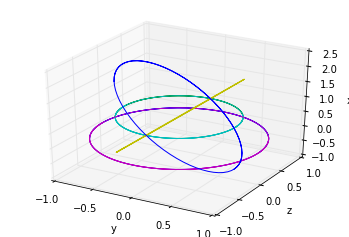

In [855]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(ring_path[:,1], ring_path[:,2], ring_path[:,0])
ax.plot(ring_path[:,7], ring_path[:,8], ring_path[:,6])
ax.plot(ring_path[:,13], ring_path[:,14], ring_path[:,12])
ax.plot(ring_path[:,19], ring_path[:,20], ring_path[:,18])
ax.plot(ring_path[:,25], ring_path[:,26], ring_path[:,24])
ax.plot(ring_path[:,31], ring_path[:,32], ring_path[:,30])
ax.plot(ring_path[:,37], ring_path[:,38], ring_path[:,36])
ax.plot(ring_path[:,43], ring_path[:,44], ring_path[:,42])
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_zlabel('x')
plt.show()

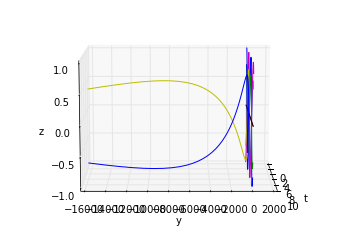

In [849]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(t, ring_path[:,0], ring_path[:,1])
ax.plot(t, ring_path[:,6], ring_path[:,7])
ax.plot(t, ring_path[:,12], ring_path[:,13])
ax.plot(t, ring_path[:,18], ring_path[:,19])
ax.plot(t, ring_path[:,24], ring_path[:,25])
ax.plot(t, ring_path[:,30], ring_path[:,31])
ax.plot(t, ring_path[:,36], ring_path[:,37])
ax.plot(t, ring_path[:,42], ring_path[:,43])
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 0)
plt.show()

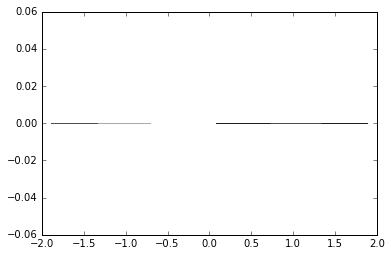

In [751]:
plt.plot(ring_path[:,1], ring_path[:,2])
plt.plot(ring_path[:,7], ring_path[:,8])
plt.plot(ring_path[:,13], ring_path[:,14])
plt.plot(ring_path[:,19], ring_path[:,20])
plt.plot(ring_path[:,25], ring_path[:,26])
plt.plot(ring_path[:,31], ring_path[:,32])
plt.plot(ring_path[:,37], ring_path[:,38])
plt.plot(ring_path[:,43], ring_path[:,44])
plt.show()

In [752]:
non_uniform_ring = odeint(ring, p0, t, args=(B_oscillating,))

C:\Users\Grant\Anaconda2\lib\site-packages\ipykernel\__main__.py:100: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


TypeError: unsupported operand type(s) for *: 'float' and 'function'

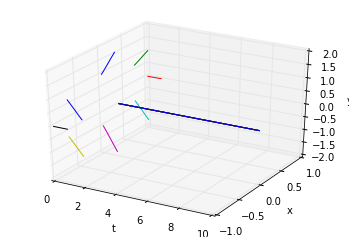

In [753]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(t, non_uniform_ring[:,0], non_uniform_ring[:,1])
ax.plot(t, non_uniform_ring[:,6], non_uniform_ring[:,7])
ax.plot(t, non_uniform_ring[:,12], non_uniform_ring[:,13])
ax.plot(t, non_uniform_ring[:,18], non_uniform_ring[:,19])
ax.plot(t, non_uniform_ring[:,24], non_uniform_ring[:,25])
ax.plot(t, non_uniform_ring[:,30], non_uniform_ring[:,31])
ax.plot(t, non_uniform_ring[:,36], non_uniform_ring[:,37])
ax.plot(t, non_uniform_ring[:,42], non_uniform_ring[:,43])
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('y')
plt.show()

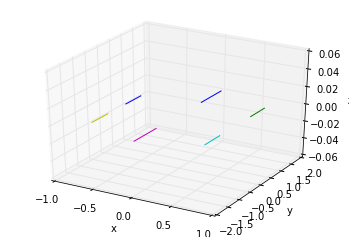

In [754]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(non_uniform_ring[:,0], non_uniform_ring[:,1], non_uniform_ring[:,2])
ax.plot(non_uniform_ring[:,6], non_uniform_ring[:,7], non_uniform_ring[:,8])
ax.plot(non_uniform_ring[:,12], non_uniform_ring[:,13], non_uniform_ring[:,14])
ax.plot(non_uniform_ring[:,18], non_uniform_ring[:,19], non_uniform_ring[:,20])
ax.plot(non_uniform_ring[:,24], non_uniform_ring[:,25], non_uniform_ring[:,26])
ax.plot(non_uniform_ring[:,30], non_uniform_ring[:,31], non_uniform_ring[:,32])
ax.plot(non_uniform_ring[:,36], non_uniform_ring[:,37], non_uniform_ring[:,38])
ax.plot(non_uniform_ring[:,42], non_uniform_ring[:,43], non_uniform_ring[:,44])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()